**Домашнее задание**

Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

**Решение**

***С каким датасетом будем работать?***

Пусть есть датасет с предприятия оборонной промышленности, созданный при тестировании некоторого устройства. Конечно, все данные засекречены и к чему относятся те или иные значения не известно. Перед каждым тестом в настройках устройства задают значения параметров $x_i$ и получают результирующую метрику $q$ на выходе. Было установлено, что устройство работает несправно, высказано предположение, что оно не реагирует на изменение каких-то параметров.  

***Задачи:***
1. определить параметры, которые не влияют на результирующую метрику;
2. найти коэффициенты уравнения зависимости, в которое могут входить как отдельные значения параметров, так и их пары.

***Генерируем датасет***

Для генерации датасета используем следующую формулу:  
$q = 5 x_1 + x_1 x_3 + x_2 x_3 + 12 x_2 + x_3 + 0 x_4 + 0 x_5 + e$,  
где: $x_i$ - значение параметра, $e$ - шум.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
size = 500
x1 = np.random.normal(loc=7, scale=3.6, size=size)
x2 = np.random.normal(loc=25, scale=10, size=size)
x3 = np.random.normal(loc=-6, scale=2.3, size=size)
x4 = np.random.normal(loc=13, scale=5, size=size)
x5 = np.random.normal(loc=8, scale=8, size=size)
e = np.random.normal(loc=0, scale=2, size=size)
result = 5 * x1 + x1 * x3 + x2 * x3 + 12 * x2 + x3 + 0 * x4 + 0 * x5 + e

tests = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "x4": x4, "x5": x5, "result": result})
tests

,x1,x2,x3,x4,x5,result
0,6.318091,15.198806,-2.392897,9.712726,20.178322,158.072418
1,7.352197,27.283986,-7.602290,7.588419,-3.659809,93.903171
2,10.091370,35.092957,-4.845192,12.727862,5.264166,249.796396
3,8.217792,2.313917,-4.128002,17.552905,-0.842561,21.192304
4,9.062050,29.723338,-8.065882,13.696234,18.898004,84.475145
...,...,...,...,...,...,...
495,6.791275,38.090284,-9.199618,11.647186,9.466215,68.318623
496,5.050331,29.646057,-6.880745,20.129078,1.032326,135.440234
497,5.272377,41.370925,-6.980997,20.858927,9.715428,189.415610
498,6.116211,30.295677,-3.873233,4.953289,8.668189,247.055567


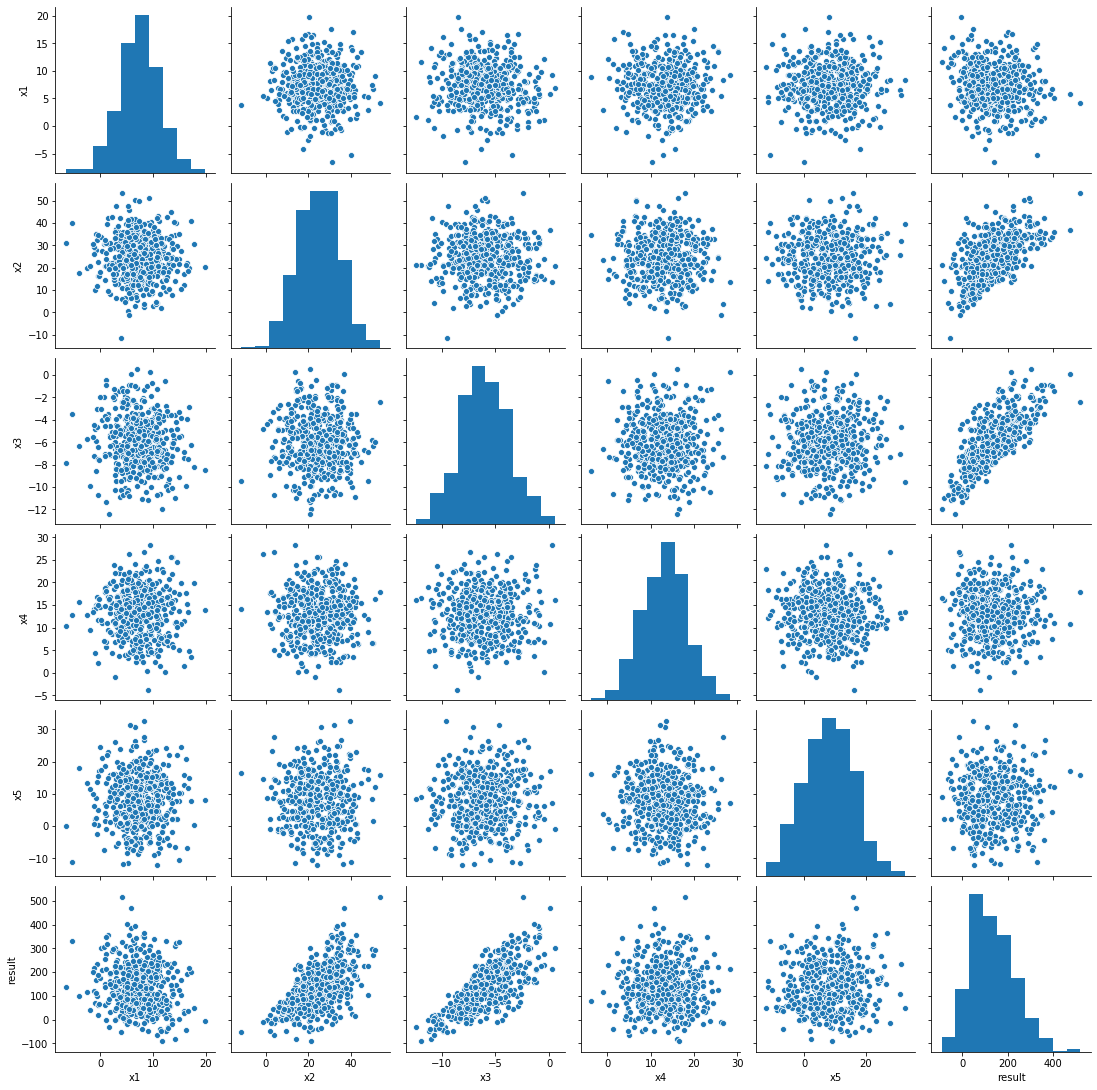

In [3]:
sns.pairplot(tests);

Видны небольшие зависимости результата от x2 и x3.

Построим линейную регрессию и вычислим значение ошибки не отбрасывая никаких параметров.

In [4]:
X = tests[["x1", "x2", "x3", "x4", "x5"]]
y = tests["result"]
reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [-1.18679347e+00  5.93139214e+00  3.18026071e+01 -1.45075485e-02
  1.38083752e-01]
Bias: 186.09315671480394
Error: 15.200710879283193


Судя по найденным весам вклад x2 и x3 наибольший. Отбросим по очереди каждый из параметров.

In [5]:
X = tests[["x2", "x3", "x4", "x5"]]
y = tests["result"]
reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [5.94866433e+00 3.19654440e+01 4.24413964e-03 1.35696213e-01]
Bias: 177.7624215203735
Error: 15.721933847881656


In [6]:
X = tests[["x1", "x3", "x4", "x5"]]
y = tests["result"]
reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [-1.77152777 31.70319117 -0.39501105  0.08312208]
Bias: 341.11339139390736
Error: 48.90877948356061


In [7]:
X = tests[["x1", "x2", "x4", "x5"]]
y = tests["result"]
reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [-2.76972495  5.90284557  0.26492479  0.42654186]
Bias: 1.6098894420929355
Error: 58.97440268786182


In [8]:
X = tests[["x1", "x2", "x3", "x5"]]
y = tests["result"]
reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [-1.18637628  5.93164221 31.80196754  0.13851725]
Bias: 185.8864319080052
Error: 15.202408009301765


In [9]:
X = tests[["x1", "x2", "x3", "x4"]]
y = tests["result"]
reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [-1.18557224e+00  5.93056172e+00  3.18177854e+01 -2.44738480e-02]
Bias: 187.4407198240198
Error: 15.213567107317255


Действительно, при отобрасывании x2 и x3 ошибка возрастает существенно больше, чем при отбрасывании x1.
Однако, при отбрасывании x4 и x5 ошибка практически не меняется. Вероятно, x4 и x5 можно исключить.

Теперь проверим на возможные сочетания и влияние сочетаний. Не будем пока исключать x4 и x5.

Построим полиномиальную регрессию и отсортируем веса по убыванию абсолютного значения.

In [10]:
X = tests[["x1", "x2", "x3", "x4", "x5"]]
y = tests["result"]
pol = PolynomialFeatures(interaction_only=True) # квадраты для нас не имеют смысла
X_new = pol.fit_transform(X)

reg = LinearRegression().fit(X_new, y)

mn = ["1", "x1", "x2", "x3", "x4", "x5", "x1*x2", "x1*x3", "x1*x4", "x1*x5", "x2*x3", "x2*x4", "x2*x5", "x3*x4", "x3*x5", "x4*x5"]
info = pd.DataFrame(np.array(reg.coef_), index=mn, columns=["weight"])
info = info.reindex(info["weight"].abs().sort_values(ascending=False).index)
info

,weight
x2,12.080456
x1,5.267122
x1*x3,1.007485
x2*x3,1.001016
x3,0.962236
x4,0.061419
x5,0.043874
x3*x4,-0.006128
x3*x5,0.005608
x1*x2,-0.005080


Если обратить внимание на первые 5 строк, то эти коэфициенты примерно совпадают со значениями, заданными в генераторе датасета.

Видно, что разница между x2\*x3 и x5 (ближаший по убыванию вес) довольно существенна, почти 1,5 порядка.

Построим модель основываясь на полученных данных, отбросив x4 и x5.

In [11]:
X = tests[["x1"]].copy()
X["x1*x3"] = tests["x1"] * tests["x3"]
X["x2*x3"] = tests["x2"] * tests["x3"]
X["x2"] = tests["x2"]
X["x3"] = tests["x3"]
y = tests["result"]

reg = LinearRegression().fit(X, y)
print(f"Weights: {reg.coef_}")
print(f"Bias: {reg.intercept_}")

pred_values = reg.predict(X)
print(f"Error: {mean_absolute_error(pred_values, y)}")

Weights: [ 5.09549064  1.00639493  1.00149882 12.01806385  0.9160844 ]
Bias: -1.2334714793646242
Error: 1.5490373251179759


В итоге ошибку удалось существенно уменьшить.